<a href="https://colab.research.google.com/github/FayCodes/AI-Assignment-Week-3/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip show tensorflow


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (convert range from 0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to fit CNN input format (28x28 images with 1 color channel)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Print dataset shape
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1), Labels shape: (60000,)
Test data shape: (10000, 28, 28, 1), Labels shape: (10000,)


In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (convert range from 0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to fit CNN input format (28x28 images with 1 color channel)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Print dataset shape
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1), Labels shape: (60000,)
Test data shape: (10000, 28, 28, 1), Labels shape: (10000,)


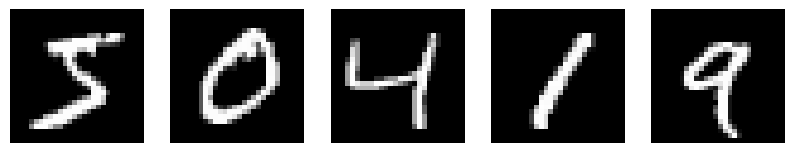

In [6]:
import matplotlib.pyplot as plt

# Display 5 sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i].squeeze(), cmap="gray")
    axes[i].axis("off")
plt.show()


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model with dropout
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # First convolutional layer
    MaxPooling2D((2,2)),  # Pooling layer
    Conv2D(64, (3,3), activation='relu'),  # Second convolutional layer
    MaxPooling2D((2,2)),  # Pooling layer
    Flatten(),  # Flattening layer
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])

# Print model summary
model.summary()



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=7, validation_data=(x_test, y_test), callbacks=[early_stop])


Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.9870 - loss: 0.0406 - val_accuracy: 0.9912 - val_loss: 0.0262
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9902 - loss: 0.0321 - val_accuracy: 0.9922 - val_loss: 0.0247
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9915 - loss: 0.0274 - val_accuracy: 0.9921 - val_loss: 0.0249
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9924 - val_loss: 0.0258
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accuracy: 0.9918 - val_loss: 0.0303
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9941 - loss: 0.0190 - val_accuracy: 0.9928 - val_loss: 0.0266
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 31ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9929 - val_loss: 0.0261


In [12]:
history = model.fit(x_train, y_train, epochs=7, validation_data=(x_test, y_test), callbacks=[early_stop])


Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9944 - loss: 0.0165 - val_accuracy: 0.9920 - val_loss: 0.0306
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9948 - loss: 0.0159 - val_accuracy: 0.9937 - val_loss: 0.0230
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9954 - loss: 0.0139 - val_accuracy: 0.9937 - val_loss: 0.0301
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9954 - loss: 0.0152 - val_accuracy: 0.9920 - val_loss: 0.0305
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9962 - loss: 0.0116 - val_accuracy: 0.9936 - val_loss: 0.0269


In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2%}")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9918 - loss: 0.0292
Test Accuracy: 99.37%
Test Loss: 0.0230


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


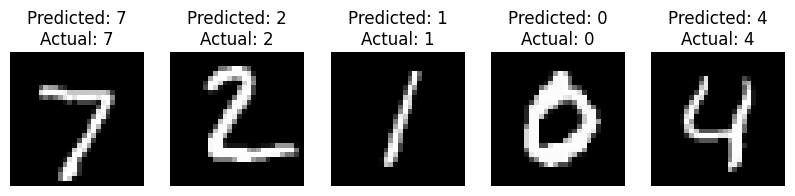

In [14]:
import matplotlib.pyplot as plt

# Get model predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Display 5 sample images with predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_test[i].squeeze(), cmap="gray")
    axes[i].set_title(f"Predicted: {predicted_labels[i]}\nActual: {y_test[i]}")
    axes[i].axis("off")
plt.show()


Ethical Considerations in AI Models

AI models, including those trained on datasets like MNIST for digit classification or Amazon Reviews for sentiment analysis, can unintentionally inherit biases from their training data. These biases can affect the fairness and accuracy of predictions, leading to skewed results that disproportionately favor certain groups or patterns.

For example, in the MNIST dataset, if certain digits (like "1" or "7") appear more frequently than others, the model might become better at recognizing those digits while struggling with less common ones. Similarly, in Amazon Reviews sentiment analysis, biases can emerge if the dataset contains more reviews from a specific demographic or product category, leading to unfair sentiment predictions.

To address these concerns, tools like TensorFlow Fairness Indicators can help analyze model performance across different subgroups, ensuring that predictions remain balanced and unbiased. Additionally, spaCy’s rule-based systems can refine text processing by filtering out biased language patterns, improving the fairness of NLP models.

Ultimately, ethical AI development requires continuous monitoring, diverse training data, and fairness-aware evaluation techniques to ensure that models make equitable and reliable predictions.

In [ ]:
#Tensorflow script with errors

import tensorflow as tf

# Define a simple model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Incorrect input shape
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])  # Incorrect loss function

# Generate random data (incorrect shape)
x_train = tf.random.normal((60000, 28, 28))  # Should be flattened to (60000, 784)
y_train = tf.random.uniform((60000,), maxval=10, dtype=tf.int32)

# Train the model
model.fit(x_train, y_train, epochs=5)  # Will cause shape mismatch error


In [3]:
# Debugged code

import tensorflow as tf

# Define a corrected model
model = tf.keras.models.Sequential([
     tf.keras.layers.Input(shape=(28, 28)),  # ✅ Define input layer first
    tf.keras.layers.Flatten(),  # ✅ No need for input_shape here
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Correct loss function for classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Generate correctly shaped random data
x_train = tf.random.normal((60000, 28, 28))  # MNIST images are 28x28
y_train = tf.random.uniform((60000,), maxval=10, dtype=tf.int32)  # Labels should be integers

# Train the model
model.fit(x_train, y_train, epochs=5)  # Now runs without shape mismatch errors


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0984 - loss: 2.5380
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1852 - loss: 2.2276
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2276 - loss: 2.1530
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2878 - loss: 2.0285
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3612 - loss: 1.8545
